In [5]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Stop words list
stop = pd.read_csv("stop words.csv", encoding = 'unicode_escape')
stop =list(stop['stop word'])

In [6]:
## Read Joined data and Drop null columns
All = pd.read_csv("../joined_data.csv")
All.drop(['Unnamed: 0','Unnamed: 5', 'Unnamed: 6'], 1, inplace=True)
All.head(2)

,Band,cleaned_band,Lyrics,Song,cleaned_song,Column,title,cleaned_title,artist_name,cleaned_artist_name,duration,year
0,Elin Lanto,elinlanto,I watch the leaves fall to the ground\nSuddenl...,as long as i can dream,aslongasicandream,150250,as long as i can dream,aslongasicandream,elin lanto,elinlanto,191.39873,2005
1,Elin Sigvardsson,elinsigvardsson,I'll let it burn. \nWords in a dirty paper cup...,papercup words,papercupwords,51876,papercup words,papercupwords,elin sigvardsson,elinsigvardsson,251.84608,2003


In [ ]:
## Remove duplicates
unique = All.drop_duplicates(["cleaned_band","Song"])
len(All), len(unique)

In [ ]:
## Create a new column with Lyrics column into a list of words
unique["lst_words"] = [x.split() for x in unique["Lyrics"].astype(str)]
unique.head(3)

In [ ]:
# remove speciall leading and trailing characters
def remove_characters(row):

        return [x.strip(",.!#[]/'") for x in row]
    
unique['clean_words'] = unique.apply(lambda x: remove_characters(x['lst_words']), axis=1)

len(unique['lst_words'][0]), len(unique['clean_words'][0])

In [ ]:
# remove stop words from each list in each row
## use set to remove duplicate words
def remove_stop(row, stop):

        return list(set([x.lower() for x in row if x.lower() not in stop]))
    
unique['wo_stop'] = unique.apply(lambda x: remove_stop(x['clean_words'], stop), axis=1)

len(unique['lst_words'][0]), len(unique['wo_stop'][0])

In [ ]:
# Drop unnessary columns
unique.drop(['cleaned_song', 'Column', 'title', 'cleaned_title', 'artist_name', 'cleaned_artist_name'], 1, inplace=True)
unique

In [ ]:
## Flatten unique['wo_stop'] to calculate the count of words
flatlist=[i for sublist in unique['wo_stop'].tolist() for i in sublist]

In [ ]:
## top 1000 words
popular = pd.DataFrame(pd.value_counts(np.array(flatlist))[:100])
popular = list(popular.index.values)
popular

In [ ]:
## select lyrics that have the top words
def popular_words(row, popular):

        return list(set([x for x in row if x.lower() in popular]))
    
unique['only_popular_word'] = unique.apply(lambda x: popular_words(x['wo_stop'], popular), axis=1)

len(unique['wo_stop'][0]), len(unique['only_popular_word'][0]), len(unique)

In [ ]:
## Remove empty lists-meaning those lyrics dnt have the popular words
unique = unique[unique['only_popular_word'].map(lambda d: len(d)) > 0]
len(unique)

In [ ]:
## Year and only_popular_word are needed from here on
unique.head(3)

In [ ]:
## Split to three periods
period_1 = unique[unique['year'] <= 1983]
period_2 = unique[(unique['year'] > 1983) & (unique['year'] <=1991)]
period_3 = unique[(unique['year'] > 1991)]

len(period_1), len(period_2), len(period_3)

In [ ]:
## Period 1 to dict
word_dict_1 = dict(zip(period_1["Song"], period_1["only_popular_word"]))
word_dict_1

In [ ]:
## Period 2 to dict
word_dict_2 = dict(zip(period_2["Song"], (period_2["only_popular_word"])))
word_dict_2

In [ ]:
## Period 3 to dict
word_dict_3 = dict(zip(period_3["Song"], (period_3["only_popular_word"])))
word_dict_3

# Clay's Contribution
## 1. Deduping songs

In [7]:
import sys
sys.path.append("../") # go to parent dir
import word_processing as wp

In [8]:
All.head()

,Band,cleaned_band,Lyrics,Song,cleaned_song,Column,title,cleaned_title,artist_name,cleaned_artist_name,duration,year
0,Elin Lanto,elinlanto,I watch the leaves fall to the ground\nSuddenl...,as long as i can dream,aslongasicandream,150250,as long as i can dream,aslongasicandream,elin lanto,elinlanto,191.39873,2005
1,Elin Sigvardsson,elinsigvardsson,I'll let it burn. \nWords in a dirty paper cup...,papercup words,papercupwords,51876,papercup words,papercupwords,elin sigvardsson,elinsigvardsson,251.84608,2003
2,Elio e le Storie Tese,elioelestorietese,Quando ero piccolo tutti mi sherzavano\nPer le...,john holmes (una vita per il cinema),johnholmes,76768,john holmes (una vita per il cinema),johnholmes,elio e le storie tese,elioelestorietese,234.03057,1989
3,Elio e le Storie Tese,elioelestorietese,"When I was just a boy,\nEveryone made fun of m...",john holmes,johnholmes,76768,john holmes (una vita per il cinema),johnholmes,elio e le storie tese,elioelestorietese,234.03057,1989
4,Elio e le Storie Tese,elioelestorietese,"Parcheggi abusivi, applausi abusivi, villette ...",la terra dei cachi,laterradeicachi,370599,la terra dei cachi,laterradeicachi,elio e le storie tese,elioelestorietese,248.37179,1996


In [33]:
df_raw

,Band,cleaned_band,Lyrics,Song,cleaned_song,Column,title,cleaned_title,artist_name,cleaned_artist_name,duration,year
0,Elin Lanto,elinlanto,I watch the leaves fall to the ground\nSuddenl...,as long as i can dream,aslongasicandream,150250,as long as i can dream,aslongasicandream,elin lanto,elinlanto,191.39873,2005
1,Elin Sigvardsson,elinsigvardsson,I'll let it burn. \nWords in a dirty paper cup...,papercup words,papercupwords,51876,papercup words,papercupwords,elin sigvardsson,elinsigvardsson,251.84608,2003
2,Elio e le Storie Tese,elioelestorietese,Quando ero piccolo tutti mi sherzavano\nPer le...,john holmes (una vita per il cinema),johnholmes,76768,john holmes (una vita per il cinema),johnholmes,elio e le storie tese,elioelestorietese,234.03057,1989
3,Elio e le Storie Tese,elioelestorietese,"When I was just a boy,\nEveryone made fun of m...",john holmes,johnholmes,76768,john holmes (una vita per il cinema),johnholmes,elio e le storie tese,elioelestorietese,234.03057,1989
4,Elio e le Storie Tese,elioelestorietese,"Parcheggi abusivi, applausi abusivi, villette ...",la terra dei cachi,laterradeicachi,370599,la terra dei cachi,laterradeicachi,elio e le storie tese,elioelestorietese,248.37179,1996
...,...,...,...,...,...,...,...,...,...,...,...,...
142638,Demon Hunter,demonhunter,Bitter thoughts became your every waking breat...,thorns,thorns,125527,thorns,thorns,demon hunter,demonhunter,246.07302,2007
142639,Demon Hunter,demonhunter,Ear at the voice inside\nDig a deeper tomb and...,the wrath of god,thewrathofgod,448971,the wrath of god,thewrathofgod,demon hunter,demonhunter,244.79302,2007
142640,Demon Hunter,demonhunter,Don't come on quietly when you draw near\nDon'...,blood in the tears,bloodinthetears,204106,blood in the tears,bloodinthetears,demon hunter,demonhunter,288.93995,2010
142641,Demon Hunter,demonhunter,"Remember the threat from which it was said\n""Y...",shallow water,shallowwater,109553,shallow water,shallowwater,demon hunter,demonhunter,223.71220,2010


In [10]:
df = df_raw.drop_duplicates(subset = ["cleaned_band", "cleaned_song"])

In [39]:
df.groupby("cleaned_song").count()[['cleaned_band']].value_counts()

cleaned_band
1               58130
2                5429
3                1919
4                 944
5                 525
6                 334
7                 218
8                 168
9                 107
10                 84
11                 74
13                 43
12                 41
16                 29
17                 27
14                 24
15                 20
20                 12
21                 12
19                 11
28                  9
18                  9
0                   8
22                  7
24                  5
35                  4
23                  4
25                  4
26                  4
27                  3
30                  3
36                  3
38                  3
31                  2
43                  1
59                  1
57                  1
48                  1
45                  1
37                  1
40                  1
39                  1
33                  1
32                  1
29                 

In [43]:
#CASE 1: Two songs are the same (Count 5430)
song_dupes = df.groupby("cleaned_song").filter(lambda x: len(x) == 2)
print(len(song_dupes)/2)
song_dupes.sort_values("cleaned_song")

5430.0


,Band,cleaned_band,Lyrics,Song,cleaned_song,Column,title,cleaned_title,artist_name,cleaned_artist_name,duration,year
108095,Gram Parsons,gramparsons,"Was one thousand dollars wedding, supposed to ...",$1000 wedding,1000wedding,6154,$1000 wedding,1000wedding,gram parsons,gramparsons,303.17669,1974
15427,Willie Nelson,willienelson,It was a $1000 wedding supposed to be held the...,$1000 wedding,1000wedding,460780,$ 1000 wedding,1000wedding,willie nelson,willienelson,185.02485,2006
140335,30 Seconds to Mars,30secondstomars,I believe in nothing\nNot the end and not the ...,100 suns,100suns,273910,100 suns,100suns,30 seconds to mars,30secondstomars,117.49832,2009
86778,Caliban,caliban,"A hundred suns, born to kill\nIt is madness, a...",100 suns,100suns,157595,100 suns (album version),100suns,caliban,caliban,236.27710,2004
75833,Young Dro,youngdro,Young Dro\nY'all already know what it is when ...,100 yard dash,100yarddash,223340,100 yard dash (featuring xtaci) (explicit albu...,100yarddash,young dro,youngdro,179.53914,2006
...,...,...,...,...,...,...,...,...,...,...,...,...
99517,David Bowie,davidbowie,"Yeah, yeah\nYeah, yeah\nYeah, yeah\nOh, yeah, ...",zeroes,zeroes,212730,zeroes (1999 digital remaster),zeroes,david bowie,davidbowie,344.45016,1987
18626,The Bluetones,thebluetones,"It was in those wonder-lust years, after I'd j...",zero tolerance,zerotolerance,418728,zero tolerance,zerotolerance,the bluetones,thebluetones,228.04853,2000
29751,Kottonmouth Kings,kottonmouthkings,The war on drugs is a war on me and if its not...,zero tolerance,zerotolerance,337969,zero tolerance,zerotolerance,kottonmouth kings,kottonmouthkings,188.62975,2002
59044,Jovenes Pordioseros,jovenespordioseros,Zorra\nJÃƒÂ³venes pordioseros.\n\nEsta maÃƒÂ±a...,zorra,zorra,402730,zorra,zorra,jovenes pordioseros,jovenespordioseros,145.99791,2004


In [114]:
shifted = df.groupby('cleaned_song').shift(1)
song_dupes_comp = song_dupes.join(shifted.rename(columns=lambda x: x+"_lag")).sort_values("cleaned_song")
song_dupes_comp = song_dupes_comp[['cleaned_song', 'Lyrics', 'Lyrics_lag', 'artist_name', 'artist_name_lag']].dropna()

In [115]:
song_dupes_comp.sort_values("cleaned_song").head()

,cleaned_song,Lyrics,Lyrics_lag,artist_name,artist_name_lag
108095,1000wedding,"Was one thousand dollars wedding, supposed to ...",It was a $1000 wedding supposed to be held the...,gram parsons,willie nelson
140335,100suns,I believe in nothing\nNot the end and not the ...,"A hundred suns, born to kill\nIt is madness, a...",30 seconds to mars,caliban
108612,100yarddash,I tried to run but couldn't get too far\nMy he...,Young Dro\nY'all already know what it is when ...,raphael saadiq,young dro
112111,1015saturdaynight,10.15\n10.15\nSaturday night\nSaturday night\n...,10:15 on a Saturday night\nAnd the tap\nDrips ...,the cure,the living end
100168,11Jul,I met her at the 7-11\nNow I'm in seventh heav...,I met her at the 7-11\nNow I'm in seventh heav...,ramones,the postmarks


In [110]:
def find_lyric_similarity(lyric1_col: pd.Series, lyric2_col: pd.Series):
    lyrics = pd.concat(
        [lyric1_col.reset_index(drop=True), lyric2_col.reset_index(drop=True)],
        ignore_index=True)
    encoded_lyrics = one_hot_encoding(lyrics, 'unigram')[0].toarray()

    lyrics_1 = encoded_lyrics[0:len(lyric1_col)]
    lyrics_2 = encoded_lyrics[len(lyric1_col):]

    cosine_scores = []
    for i in range(lyrics_1.shape[0]):
        score = cosine_similarity([lyrics_1[i]], [lyrics_2[i]])[0]
        cosine_scores.append(score)

    return cosine_scores

In [116]:
## COMMENT: True Covers
song_dupes_comp['score'] = wp.find_lyric_similarity(song_dupes_comp['Lyrics'], song_dupes_comp['Lyrics_lag'])
song_dupes_comp[song_dupes_comp['score']>.95].head() ## COMMENT: 596 songs are actual covers

,cleaned_song,Lyrics,Lyrics_lag,artist_name,artist_name_lag,score
108095,1000wedding,"Was one thousand dollars wedding, supposed to ...",It was a $1000 wedding supposed to be held the...,gram parsons,willie nelson,[0.9554333937093653]
100168,11Jul,I met her at the 7-11\nNow I'm in seventh heav...,I met her at the 7-11\nNow I'm in seventh heav...,ramones,the postmarks,[1.0]
56153,22steps,"If I were him,\nI'd know your birthday.\nJust ...",If I were him\nI'd know your birthday\nJust wh...,andy stochansky,damien leith,[0.9597148699373931]
132279,2hb,Oh I was moved by your screen dream\nCelluloid...,Oh I was moved by your screen dream\nCelluloid...,roxy music,bryan ferry,[1.0]
95458,7things,I probably shouldn't say this\nBut at times I ...,I probably shouldn't say this\nBut at times I ...,kidz bop kids,miley cyrus,[0.9650585620411926]


In [117]:
len(song_dupes_comp[song_dupes_comp['score']>.95])

596

## 2. Subsetting Vocabulary

(array([101428.,  43793.,  11262.,   3647.,   1686.,    979.,    705.,
           488.,    348.,    215.]),
 array([0.00577182, 0.10519464, 0.20461746, 0.30404027, 0.40346309,
        0.50288591, 0.60230873, 0.70173155, 0.80115436, 0.90057718,
        1.        ]),
 <BarContainer object of 10 artists>)

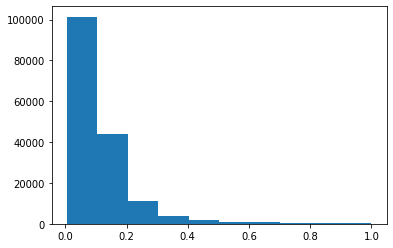

In [123]:
import matplotlib.pyplot as plt

tfidf_scores = get_tfidf_dict(df['Lyrics'].dropna(), 'unigram')
plt.hist(tfidf_scores.values(), 10)

In [ ]:
tfidf_scores_bigrams = get_tfidf_dict(df['Lyrics'].dropna(), 'bigram')
plt.hist(tfidf_scores_bigrams.values, 10)